#### Libraries

In [4]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

#### Imports from util file

In [1]:
# for embeddings
from utils_conflict_unsupervised import cal_cosine_bert_tf
from utils_conflict_unsupervised import cal_cosine_sim
from utils_conflict_unsupervised import cal_cosine_use

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# for finding the optimal cutoff from training set
from utils_conflict_unsupervised import find_optimal_cutoff_withroc
from utils_conflict_unsupervised import find_conflict_detect
from utils_conflict_unsupervised import plot_roc_curve
from utils_conflict_unsupervised import test_cutoff

#### Data import

In [6]:
req_df = pd.read_excel('/content/drive/MyDrive/Req_Conflict_Data/world_vista_labeled.xlsx',usecols=['idx','requirement', 'conflict', 'label'])
req_df['requirement'] = req_df['requirement'].astype(str)

In [7]:
req_df.head()

idx                                        requirement conflict   label
0  1.0  The system shall allow medication orders to be...      Yes  Yes(2)
1  2.0  The system shall allow medication orders to be...      Yes  Yes(1)
2  3.0  The system shall allow physician offices to us...      Yes  Yes(4)
3  4.0  The system shall allow physician offices to on...      Yes  Yes(3)
4  5.0  The system shall trigger registration reminder...       No     NaN

In [8]:
# No: non-conflict, Yes: conflict
req_df['conflict'].value_counts()

No     84
Yes    56
Name: conflict, dtype: int64

In [9]:
train,test = train_test_split(req_df,train_size=0.80,stratify=req_df['conflict'].values,random_state = 45)
print("Training instances :\n",train['conflict'].value_counts())
print("Testing instances :\n",test['conflict'].value_counts())

Training instances :
 No     67
Yes    45
Name: conflict, dtype: int64
Testing instances :
 No     17
Yes    11
Name: conflict, dtype: int64


#### Identification of conflicts

Universal sentence encoder 



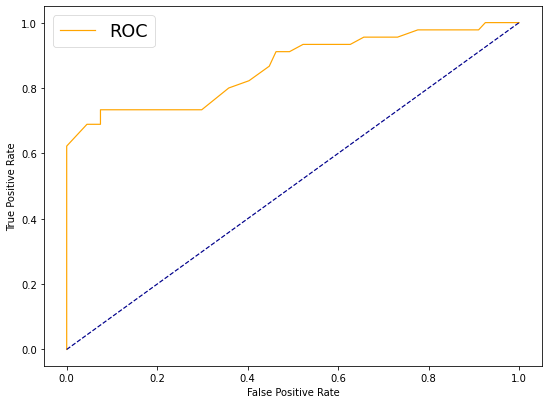

In [10]:
# get the optimal cosine similarity cutoff
cos_dict = find_conflict_detect(train,embeddings = 3)

In [11]:
# cosine similarity cutoff with roc curve
cutoff = find_optimal_cutoff_withroc(cos_dict)
print(cutoff)

0.59


In [12]:
test_df,candidate_set = test_cutoff(test,cutoff,embeddings = 3)

Universal sentence encoder 

              precision    recall  f1-score   support

          No   0.650000  0.764706  0.702703        17
         Yes   0.500000  0.363636  0.421053        11

    accuracy                       0.607143        28
   macro avg   0.575000  0.564171  0.561878        28
weighted avg   0.591071  0.607143  0.592054        28

********** Confusion Matrix for this fold *************

[[13  4]
 [ 7  4]]
The tpr for this fold is : 0.36363636363636365


#### Phase - 2 Verification of Conflicts

In [13]:
from utils_conflict_unsupervised import final_conflict

In [14]:
final_conflict(req_df,candidate_set,test_df)

              precision    recall  f1-score   support

          No   0.590909  0.764706  0.666667        17
         Yes   0.333333  0.181818  0.235294        11

    accuracy                       0.535714        28
   macro avg   0.462121  0.473262  0.450980        28
weighted avg   0.489719  0.535714  0.497199        28

********** Confusion Matrix for this fold *************

[[13  4]
 [ 9  2]]
